In [222]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

#Expensive Visualization Method Outline --------------------------------------------------------------------------

#Establish Domain and n points within
    
#Use shell commands to Modify & Run FENN at each x and y "point"

#Pull parameters from FENN simulation log

#Compute the Cost Function

#Interpolate between points

#Plots

file_path = "/home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt"

'''
COMP = "g++ Networks.cpp -o FENN \
-I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
-I/usr/include/eigen3 \
-L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-lhdf5_cpp -lhdf5"
'''

'\nCOMP = "g++ Networks.cpp -o FENN -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include -I/usr/include/eigen3 -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -lhdf5_cpp -lhdf5"\n'

In [223]:
#Establish domain

EpsA_range=(1.0e-02, 1.0e-06)#Hi to Low
EpsR_range=(1.0e-02, 1.0e-06)

EpsA_points = []
EpsR_points = []

#tune accuracy
n = 20

EpsA_step = (max(EpsA_range)-min(EpsA_range))/n
EpsR_step = (max(EpsR_range)-min(EpsR_range))/n

for i in range(n):

    EpsA_points.append(min(EpsA_range)+(i*EpsA_step))
    EpsR_points.append(min(EpsR_range)+(i*EpsR_step))
    
print(EpsA_points) #USE TO PLOT
print(EpsR_points)


[1e-06, 0.0005009500000000001, 0.0010009, 0.0015008500000000002, 0.0020008000000000005, 0.0025007500000000004, 0.0030007000000000007, 0.003500650000000001, 0.004000600000000001, 0.004500550000000001, 0.005000500000000001, 0.005500450000000001, 0.006000400000000001, 0.006500350000000001, 0.007000300000000002, 0.007500250000000002, 0.0080002, 0.008500150000000001, 0.0090001, 0.009500050000000001]
[1e-06, 0.0005009500000000001, 0.0010009, 0.0015008500000000002, 0.0020008000000000005, 0.0025007500000000004, 0.0030007000000000007, 0.003500650000000001, 0.004000600000000001, 0.004500550000000001, 0.005000500000000001, 0.005500450000000001, 0.006000400000000001, 0.006500350000000001, 0.007000300000000002, 0.007500250000000002, 0.0080002, 0.008500150000000001, 0.0090001, 0.009500050000000001]


In [224]:
#Initialize
t_array = [None] * n
ERR_array = [None] * n

#Shell Commands

#Change working directory!

os.chdir('/home/ojc/Downloads/UTKCAP/FENN')

#Modify FENN

for i in range(n):
    
#Fix python -> C++ array bug
    EpsA_value = EpsA_points[i]
    EpsR_value = EpsR_points[i]
    
    !sed -i "s/double EpsA = [0-9.e+-]*;/double EpsA = {EpsA_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp
    !sed -i "s/double EpsR = [0-9.e+-]*;/double EpsR = {EpsR_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp

#Compile FENN
    
    !g++ /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp -o FENN \
        -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
        -I/usr/include/eigen3 \
        -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -lhdf5_cpp -lhdf5
    
    !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt
    
    !./FENN > /dev/null 2>&1
    
    '''!ls /home/ojc/Downloads/UTKCAP/FENN'''
    
#Read from simulation_log.txt
    
    with open(file_path, 'r') as file:
        for line in file:
            if "Wall-clock time:" in line:
                t_array[i] = line.split(":")[1].strip() 
            if "Accumulated Error:" in line:
                ERR_array[i] = line.split(":")[1].strip() 
                
    '''print(f'Iteration {i}: Time = {t_array[i]}, Error = {ERR_array[i]}')'''

print(t_array) #USE TO PLOT
print(ERR_array)

['1947950 microseconds', '450442 microseconds', '1733087 microseconds', '752322 microseconds', '611592 microseconds', '582998 microseconds', '921239 microseconds', '1250686 microseconds', '706318 microseconds', '1012137 microseconds', '1187982 microseconds', '810702 microseconds', '1644679 microseconds', '610750 microseconds', '541871 microseconds', '1544847 microseconds', '1202183 microseconds', '1310902 microseconds', '1217405 microseconds', '864336 microseconds']
['0.0728388', '9.36403', '18.5364', '27.7056', '37.0071', '46.1447', '55.4141', '64.4538', '73.6912', '82.9286', '92.166', '101.403', '110.641', '119.878', '129.116', '138.353', '147.591', '156.828', '166.066', '175.303']


In [225]:
#Fixing time units

for i in range(n):
    t_value = t_array[i]
    
    if isinstance(t_value, float):
        continue  
    
    value, unit = t_value.split()
    
    if unit == 'microseconds':
        unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_array[i] = value * unit

print(t_array)

ERR_array = [float(x) for x in ERR_array]

print(ERR_array)

[1.9479499999999998, 0.45044199999999995, 1.7330869999999998, 0.7523219999999999, 0.611592, 0.582998, 0.9212389999999999, 1.250686, 0.706318, 1.012137, 1.1879819999999999, 0.8107019999999999, 1.644679, 0.61075, 0.541871, 1.5448469999999999, 1.202183, 1.310902, 1.2174049999999998, 0.864336]
[0.0728388, 9.36403, 18.5364, 27.7056, 37.0071, 46.1447, 55.4141, 64.4538, 73.6912, 82.9286, 92.166, 101.403, 110.641, 119.878, 129.116, 138.353, 147.591, 156.828, 166.066, 175.303]


In [226]:
#Compute the Cost Function

#Initialize some hyperparameters
k = 1
eta = 1
rho = 1

speed = [None] * n
Cost_array = [None] * n

for i in range(n):
    
    speed[i] = (1-(1/t_array[i]))
    
    Cost_array[i] = np.sqrt(speed[i]**2 + ERR_array[i]**2)

print (Cost_array) # USE TO PLOT

[0.49206075491133444, 9.443175285025104, 18.541225678575035, 27.707555935166205, 37.01254886089034, 46.15024324710617, 55.41416595189436, 64.45411166211369, 73.69237301895261, 82.92860086698138, 92.16613583502148, 101.4032688364718, 110.64169434818082, 119.87969417292925, 129.11876801880234, 138.35344953022576, 147.59109582042572, 156.82817932991043, 166.06609601919212, 175.303070265898]


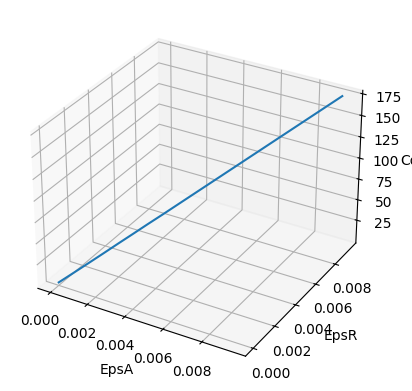

In [233]:
#3D plots

x = EpsA_points
y = EpsR_points
z = Cost_array

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('EpsA')
ax.set_ylabel('EpsR')
ax.set_zlabel('Cost')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


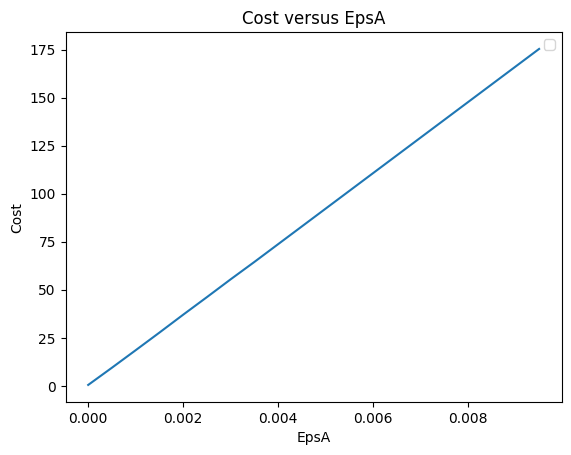

In [235]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsA_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsA')
plt.ylabel('Cost')
plt.title('Cost versus EpsA')

# Add a legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


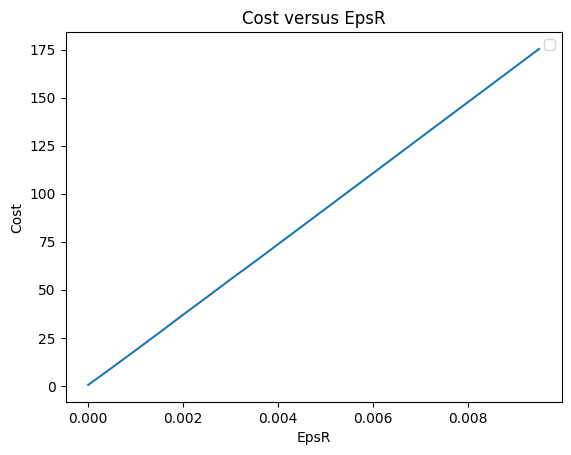

In [236]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsR_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsR')
plt.ylabel('Cost')
plt.title('Cost versus EpsR')

# Add a legend
plt.legend()

# Show the plot
plt.show()